In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)


In [22]:
#df_pois = pd.read_csv('pois_unique.csv')
df_pois = pd.read_csv('pois_filtrados.csv')
df_bus = pd.read_csv('Paraderos.csv')
df_metro = pd.read_csv('Metros.csv')
df_deptos = pd.read_csv('dataset_santiago.csv')

C:\Users\Pc-ADS\AppData\Local\Temp\ipykernel_29768\2719279618.py:5: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_deptos = pd.read_csv('dataset_santiago.csv')


In [9]:
df_pois.sample(3)

,longitude,latitude,type,class,name
6556,-70.557168,-33.387018,Pitch,sport_and_leisure,Estadio Croata
2156,-70.605124,-33.454448,Arts Centre,arts_and_entertainment,Galería Suizspacio
7692,-70.645168,-33.443734,Museum,arts_and_entertainment,Museo Masónico


In [10]:
df_bus.sample(3)

,FID,id,codigo,simt,tipo,clasificac,comuna,zona,eje,desde,hacia,sentido,fila_super,fila_infer,grupo_de_p,identifica,nombre_ust,x,y,zona_paga,n__et,corredor,ubica_corr,rts,tipo_rts,rm,estado_rm,estado,existe_se,codigo_ant,fecha_fich,cod_sol_pa,comentario,longitud,latitud
53,54,54,L-1-12-75-NS,PB863,PS,ACTIVO,INDEPENDENCIA,B,AV. VIVACETA,CDTE CANALES,RIVERA,N-S,RIVERA,AV. VIVACETA,-,-,RIVERA / AV. VIVACETA,345566.23,6300164.03,0,NaN,NaN,NaN,1.0,Refugio 4(m),0,NaN,CON REFUGIO,SERVIU-Dic/2010,NaN,NaN,7949.0,NaN,-70.661138,-33.426790
4711,4712,4300,L-21-6-5-OP,PH507,PS,ACTIVO,SAN JOAQUÖN,H,CAPITµN PRAT,RIO SAN LORENZO,HAYDEN,O-P,AV. HAYDN,CAPITµN PRAT,-,-,AV. HAYDN / CAPITµN PRAT,349296.49,6292043.40,0,NaN,NaN,NaN,1.0,Refugio 4(m),0,NaN,CON REFUGIO,SERVIU-Dic/2010,NaN,NaN,NaN,NaN,-70.622392,-33.500537
4630,4631,4219,L-20-21-15-NS,PA516,PS,ACTIVO,SANTIAGO,A,ARTURO PRAT,SARGENTO ALDEA,¥UBLE,N-S,¥UBLE,ARTURO PRAT,-,-,¥UBLE / ARTURO PRAT,346962.56,6295464.50,0,NaN,NaN,NaN,1.0,Refugio 4(m),0,NaN,CON REFUGIO,SERVIU-Dic/2010,NaN,NaN,NaN,NaN,-70.646925,-33.469361


In [11]:
df_metro.sample(3)

,X,Y,FID,objectid,id,especial,estacion,nombre,temporal,f1,tipo,linea,longitud,latitud
114,-7.871087e+06,-3.954046e+06,115,0,115,EXISTENTE,EXISTENTE,BLANQUEADO,NaN,0,ESTACION METRO,Linea 5,-70.707181,-33.441442
40,-7.860624e+06,-3.962925e+06,41,41,41,EXISTENTE,EXISTENTE,PEDRERO,NaN,1,ESTACION METRO,Linea 5,-70.613183,-33.507973
108,-7.874711e+06,-3.958565e+06,109,0,109,EXISTENTE,EXISTENTE,LAS PARCELAS,NaN,0,ESTACION METRO,Linea 5,-70.739728,-33.475314


In [12]:
df_pois.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23740 entries, 0 to 23739
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  23740 non-null  float64
 1   latitude   23740 non-null  float64
 2   type       23740 non-null  object 
 3   class      23740 non-null  object 
 4   name       20259 non-null  object 
dtypes: float64(2), object(3)
memory usage: 927.5+ KB


In [106]:
df_pois[df_pois['class'] == 'commercial_services'].sample(10)

,longitude,latitude,type,filterrank,category_en,sizerank,maki,class,name
38081,-70.766532,-33.428914,Educational Institution,3,Educational Institution,16,marker,commercial_services,Sun's School Excelencia Académica
17142,-70.611302,-33.432730,Bicycle Rental,5,Bicycle Rental,16,bicycle,commercial_services,Municipalidad de Providencia
32413,-70.577749,-33.601451,Taxi,5,Taxi Stand,16,marker,commercial_services,Taxi
2877,-70.555385,-33.418181,Car Repair,4,Car Repair Shop,16,car-repair,commercial_services,Mecánica Estremera
34599,-70.614249,-33.516222,Handicraft,1,NaN,15,marker,commercial_services,Taller de la Creación
19818,-70.657070,-33.445962,Childcare,5,Childcare,16,marker,commercial_services,Vitamina
8036,-70.737961,-33.365977,Glaziery,5,Glaziery,16,marker,commercial_services,PSA Glass
28795,-70.696221,-33.524227,Car Repair,2,Car Repair Shop,16,car-repair,commercial_services,Persa Automotriz
4661,-70.618800,-33.461713,Car Repair,3,Car Repair Shop,15,car-repair,commercial_services,Teknoauto
23558,-70.630068,-33.446159,Bicycle Rental,5,Bicycle Rental,16,bicycle,commercial_services,Bikesantiago


borrar: 
 - place_like (casas, condominios, edificios, algunas plazas)
 - visitor_amenities (informacion local, banos, turismo)
 - general (direccion de educaicon, registro civil, santillana, fundaciones, embajadas, etc.)
 - store_like (automotras, ropa, mascotas, peluquerias, etc)
 - biulding (ya rescate los que estaban en esta clase y eran tipo hospital, school o kindergarten)
 - motorist (las estaciones de carga de vehiculos electricos podrian sumar valor, pero son muy pocas)
 - industrial
 - historic
 - lodging
 - landmark


Evaluar:
 - commercial_services (banco, veterinaria)


In [ ]:
# Crear nueva clase 'veterinary' para POIs con type Veterinary
#df_pois.loc[df_pois['type'] == 'Veterinary', 'class'] = 'veterinary'
# Cambiar a 'medical' si el tipo es Hospital
#df_pois.loc[df_pois['type'] == 'Hospital', 'class'] = 'medical'

# Cambiar a 'educational' si el tipo es School o Kindergarten
#df_pois.loc[df_pois['type'].isin(['School', 'Kindergarten']), 'class'] = 'educational'



In [113]:
# Lista de valores no deseados en la columna 'class'
clases_a_eliminar = [
    "place_like", "visitor_amenities", "general", "store_like", "commercial_services",
    "biulding", "motorist", "industrial", "historic", "lodging", "landmark"
]

# Crear copia del DataFrame filtrando los valores
df_pois_filtrado = df_pois[~df_pois["class"].isin(clases_a_eliminar)].copy()



In [24]:
df_pois.sample(10)

,longitude,latitude,type,class,name
15888,-70.760943,-33.427480,School,educational,Escuela Especial Pudahuel Norte
22860,-70.680187,-33.570110,Pitch,sport_and_leisure,NaN
17445,-70.629994,-33.486218,Place Of Worship,religion,Iglesia Bautista Emanuel
10510,-70.591336,-33.530311,Convenience,food_and_drink_stores,Almacén Joaquito
20047,-70.628150,-33.618779,School,educational,Colegio Australia de La Pintana
695,-70.598497,-33.473531,Dentist,medical,Galia Clinica Dental
17422,-70.687105,-33.501417,School,educational,Grace School
18300,-70.621170,-33.505849,Recreation Ground,park_like,Plaza Marcela Paz
2167,-70.595955,-33.452766,Kindergarten,educational,Tia Pili
20989,-70.541114,-33.434815,Pitch,sport_and_leisure,NaN


In [ ]:
# Eliminar columnas innecesarias
#df_pois_filtrado.drop(columns=["filterrank", "sizerank", "category_en", "maki"], inplace=True)


In [ ]:
#df_pois_filtrado.to_csv("pois_filtrados.csv", index=False)


In [ ]:
import folium

# Centro aproximado de Santiago de Chile (puedes ajustarlo si quieres)
centro_santiago = [-33.45, -70.66]

# Crear el mapa
mapa = folium.Map(location=centro_santiago, zoom_start=12)

# Agregar los POIs al mapa
for _, row in df_pois.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=row["latitude"]
    ).add_to(mapa)

# Mostrar el mapa
mapa


In [43]:
# Definir los límites de la caja
lon_min, lon_max = -70.83268493413925, -70.316
lat_min, lat_max = -33.648746666655626, -33.2710659070019

# Filtrar el DataFrame para mantener solo los POIs dentro de estos límites
df_pois = df_pois[
    (df_pois['longitude'] >= lon_min) & (df_pois['longitude'] <= lon_max) &
    (df_pois['latitude']  >= lat_min) & (df_pois['latitude']  <= lat_max)
]


In [ ]:
centro_santiago = [-33.45, -70.66]

# Crear el mapa
mapa_deptos = folium.Map(location=centro_santiago, zoom_start=12)

# Agregar los deptos al mapa
for _, row in df_deptos.iterrows():
    folium.CircleMarker(
        location=[row["latitud"], row["longitud"]],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=row["id"]
    ).add_to(mapa_deptos)

# Mostrar el mapa
mapa_deptos

In [27]:
# Lista de comunas a eliminar directamente
comunas_fuera = [
    "Buin", "Paine", "Melipilla", "San José de Maipo", "Lampa",
    "María Pinto", "El Monte", "Talagante", "Peñaflor", "Alhué"
]

# Filtrar el DataFrame manteniendo solo las comunas deseadas
df_deptos = df_deptos[~df_deptos["comuna"].isin(comunas_fuera)].copy()


In [28]:
# Eliminar departamentos muy al este (Lo Barnechea)
df = df_deptos.copy()



In [30]:
# 1 km en coordenadas:
delta_lat = 0.009   # ~1km de latitud
delta_lon = 0.0104  # ~1km de longitud

# Límite hacia el este (Lo Barnechea)
limite_este = -70.4854815 + delta_lon  # Más al este son valores más cercanos a 0

# Límite hacia el norte (Colina)
limite_norte = -33.2770239 + delta_lat  # Más al norte son valores menos negativos

# Eliminar departamentos demasiado al este (Lo Barnechea extremo)
df_deptos = df_deptos[df_deptos["longitud"] <= limite_este]

# Eliminar departamentos demasiado al norte (Colina extremo)
df_deptos = df_deptos[df_deptos["latitud"] <= limite_norte]


#### Limpieza Dataset deptos

###### Pendiente, requiere más tiempo para analizar

In [3]:

df_deptos = pd.read_csv('Datasets/deptos.csv')

C:\Users\Pc-ADS\AppData\Local\Temp\ipykernel_7864\2604379263.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_deptos = pd.read_csv('Datasets/deptos.csv')


In [4]:
df_deptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26316 entries, 0 to 26315
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                26316 non-null  int64  
 1   link              26316 non-null  object 
 2   nombre            26316 non-null  object 
 3   fecha_consultado  26316 non-null  object 
 4   fecha_publicado   20335 non-null  object 
 5   divisa            26316 non-null  object 
 6   monto             26316 non-null  float64
 7   ppm2              26310 non-null  float64
 8   ppm2_avg          26253 non-null  float64
 9   superficie_t      26316 non-null  float64
 10  superficie_u      26069 non-null  float64
 11  terraza           16983 non-null  float64
 12  ambientes         9032 non-null   float64
 13  dormitorios       25612 non-null  float64
 14  banos             24001 non-null  float64
 15  ubicacion         26316 non-null  object 
 16  estacionamiento   14758 non-null  float6

In [40]:
# Reemplaza 'nombre_columna' por el nombre real de la columna que quieres explorar
df_deptos['estacionamiento'].unique()


array([ 1.00000e+00,  2.00000e+00,  5.00000e+00,  3.00000e+00,
                nan,  4.00000e+00,  1.00000e+01,  1.00000e+02,
        4.00000e+01,  3.00000e+01,  6.00000e+00,  8.00000e+00,
        7.00000e+00,  3.10000e+01,  2.20000e+01,  2.00000e+02,
        4.80000e+01,  1.70000e+01,  5.00000e+01,  1.20000e+02,
        5.30000e+02,  1.20000e+01,  1.10000e+01,  1.11111e+05,
        9.00000e+00,  1.30000e+01,  1.55000e+02,  1.60000e+01,
        1.50000e+01,  2.50000e+01,  2.60000e+01,  8.00000e+01,
        2.90000e+01,  4.50000e+01,  2.80000e+01,  2.70000e+01,
        1.40000e+01,  5.10000e+01,  3.90000e+01,  1.31000e+02,
        1.50000e+02,  3.27000e+02,  2.00000e+01,  5.60000e+01,
        2.30000e+01,  0.00000e+00,  2.10000e+01,  1.10000e+03,
        4.00000e+02,  1.10000e+02,  6.20000e+01,  6.60000e+01,
        8.90000e+01,  1.16000e+02,  1.03000e+02, -1.00000e+00])

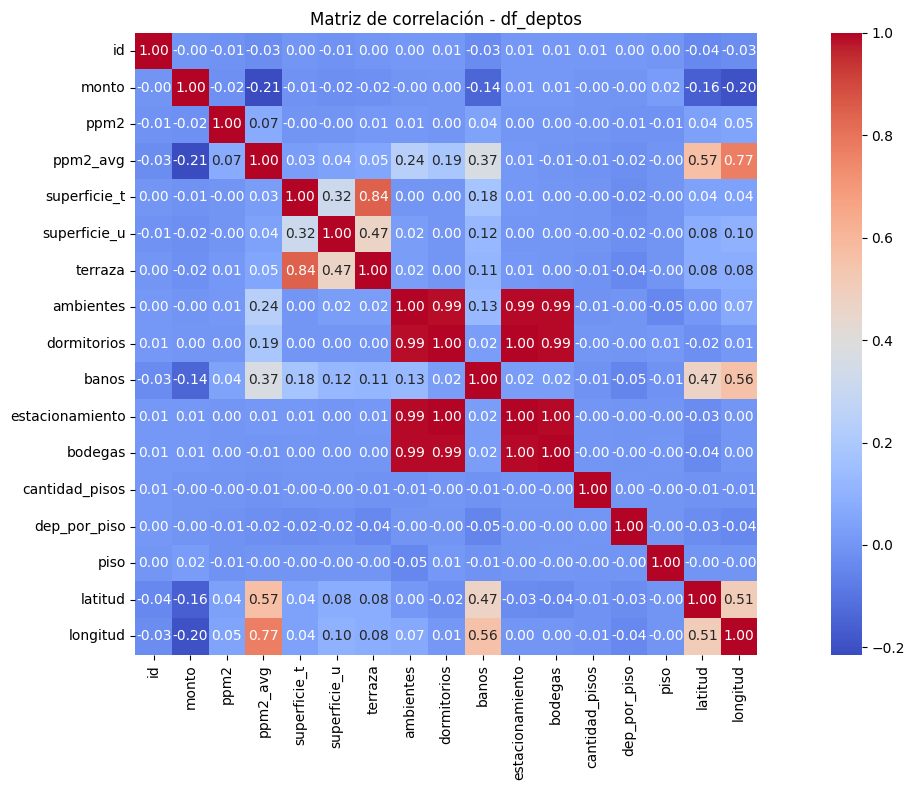

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear matriz de correlación
correlation_matrix = df_deptos.corr(numeric_only=True)

# Graficar la matriz de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación - df_deptos")
plt.tight_layout()
plt.show()


In [ ]:
# Reemplaza los nombres de columna en esta lista
columnas_a_convertir = ['columna_1', 'columna_2', 'columna_3']

# Convertir esas columnas a enteros
df_deptos[columnas_a_convertir] = df_deptos[columnas_a_convertir].astype(int)


In [ ]:
# Lista de columnas que quieres eliminar (completa aquí)
columnas_a_eliminar = [
    "nombre_columna_1",
    "nombre_columna_2",
    "nombre_columna_3",
    # agrega más si es necesario
]

# Eliminar columnas del DataFrame
df_deptos.drop(columns=columnas_a_eliminar, inplace=True)


In [32]:
df_deptos.to_csv("deptos.csv", index=False)

## Conexión a Base de Datos de grafos Neo4J Aura

In [10]:
from neo4j import GraphDatabase

uri = "neo4j+s://b073ebf5.databases.neo4j.io"
user = "neo4j"
password = "dFUBgoUZAXirgfzSyJT4z_dpznMWBU-g5Z53SHGtonE"

driver = GraphDatabase.driver(uri, auth=(user, password))

# Test de conexión
def test_connection():
    with driver.session() as session:
        result = session.run("RETURN 'Conexión exitosa con AuraDB' AS mensaje")
        for record in result:
            print(record["mensaje"])

test_connection()


Conexión exitosa con AuraDB


In [55]:
df_pois["poi_id"] = df_pois.index.astype(str)
df_pois["name"] = df_pois["name"].fillna("NoName")

In [16]:
def crear_nodos_pois(tx, row):
    query = """
    MERGE (p:POI {
        poi_id: $poi_id
    })
    SET p.name = $name,
        p.latitude = $latitude,
        p.longitude = $longitude,
        p.class = $class,
        p.type = $type
    """
    tx.run(query, **row)

def cargar_pois(df):
    with driver.session() as session:
        for _, row in df.iterrows():
            datos = {
                "poi_id": row["poi_id"],
                "name": row["name"] if pd.notna(row["name"]) else "NoName",
                "latitude": float(row["latitude"]),
                "longitude": float(row["longitude"]),
                "class": row["class"],
                "type": row["type"]
            }
            session.write_transaction(crear_nodos_pois, datos)

def crear_nodo_bus(tx, datos):
    query = """
    CREATE (b:BusStop {
        id: $id,
        simt: $simt,
        longitude: $longitude,
        latitude: $latitude
    })
    """
    tx.run(query, **datos)

def cargar_paraderos(df_bus):
    with driver.session() as session:
        for _, row in df_bus.iterrows():
            datos = {
                "id": row["id"],
                "simt": row["simt"],
                "longitude": float(row["longitud"]),
                "latitude": float(row["latitud"])
            }
            session.write_transaction(crear_nodo_bus, datos)


def crear_nodo_metro(tx, datos):
    query = """
    CREATE (m:MetroStation {
        id: $id,
        name: $name,
        type: $type,
        line: $line,
        longitude: $longitude,
        latitude: $latitude
    })
    """
    tx.run(query, **datos)

def cargar_estaciones_metro(df_metro):
    with driver.session() as session:
        for _, row in df_metro.iterrows():
            datos = {
                "id": row["id"],
                "name": row["nombre"] if pd.notna(row["nombre"]) else "NoName",
                "type": row["tipo"],
                "line": row["linea"],
                "longitude": float(row["longitud"]),
                "latitude": float(row["latitud"])
            }
            session.write_transaction(crear_nodo_metro, datos)


            
def run_query(query, parameters=None):
    with driver.session() as session:
        result = session.run(query, parameters or {})
        return [record.data() for record in result]


In [13]:
#df_pois = pd.read_csv('Datasets\pois_filtrados.csv')
df_bus = pd.read_csv('Datasets\Paraderos.csv')
df_metro = pd.read_csv('Datasets\Metros.csv')
#df_deptos = pd.read_csv('Datasets\deptos.csv')

In [18]:
df_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12635 entries, 0 to 12634
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         12635 non-null  int64  
 1   id          12635 non-null  int64  
 2   codigo      12635 non-null  object 
 3   simt        11774 non-null  object 
 4   tipo        12635 non-null  object 
 5   clasificac  12635 non-null  object 
 6   comuna      12635 non-null  object 
 7   zona        12635 non-null  object 
 8   eje         12635 non-null  object 
 9   desde       12432 non-null  object 
 10  hacia       12631 non-null  object 
 11  sentido     12635 non-null  object 
 12  fila_super  12635 non-null  object 
 13  fila_infer  12635 non-null  object 
 14  grupo_de_p  12635 non-null  object 
 15  identifica  12634 non-null  object 
 16  nombre_ust  12635 non-null  object 
 17  x           12635 non-null  float64
 18  y           12635 non-null  float64
 19  zona_paga   12635 non-nul

In [19]:
#cargar_pois(df_pois)
#cargar_estaciones_metro(df_metro)
cargar_paraderos(df_bus)

C:\Users\Pc-ADS\AppData\Local\Temp\ipykernel_7864\1551350421.py:47: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(crear_nodo_bus, datos)


[]